<a href="https://colab.research.google.com/github/mehakhafeez/NLPprojectweek6/blob/main/NLPProjectT5Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install textblob nltk rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=186ae7945770eca8e977b8e8ece7fd6b7056c4c147f26b6b30411c1ddc3dda3f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [2]:
pip install rouge-score

In [3]:
pip install transformers==4.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.23.0 which is incompatible.


In [4]:
pip install sentencepiece==0.1.96

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.2.0
    Uninstalling sentencepiece-0.2.0:
      Successfully uninstalled sentencepiece-0.2.0


In [5]:
pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.23.0 which is incompatible.


In [6]:
pip install rouge

Importing Necessary Libraries

Import libraries for data manipulation, machine learning models, visualization, and text processing.

In [7]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from transformers import (DistilBertTokenizer, DistilBertForSequenceClassification,
                          Trainer, TrainingArguments)
from torch.utils.data import DataLoader
from torch.optim import AdamW
from textblob import TextBlob
from rouge import Rouge
import re
import nltk
from transformers import T5Tokenizer, T5ForConditionalGeneration
from nltk.translate.bleu_score import sentence_bleu

In [25]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df1 = pd.read_csv('/content/1429_1.csv', quoting=3, on_bad_lines='skip')
# quoting=3 tells pandas to use the QUOTE_NONE strategy. This means that pandas will not treat any character as a quote character. This way if there are unclosed quotes, it ignores them.
# on_bad_lines='skip' replaces the deprecated 'error_bad_lines=False' to skip bad lines.
df2 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', quoting=3, on_bad_lines='skip')
df3 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', quoting=3, on_bad_lines='skip')

In [27]:
# Combine datasets into one
df = pd.concat([df1, df2, df3], ignore_index=True)

In [34]:
# Preprocess the text (remove stopwords, special characters, etc.)
def preprocess_text(text):
    # Check if the text is a string before processing
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = ' '.join([word for word in text.split() if word not in nltk.corpus.stopwords.words('english')])
        return text
    # If not a string (e.g., float), return it as is or handle it differently
    else:
        return str(text)  # Or handle NaN values appropriately

In [35]:
# Assuming the correct column name for reviews is 'reviews.text' based on later usage
df['review_clean'] = df['reviews.text'].apply(preprocess_text)

In [36]:
# Data Cleaning
data = data.drop_duplicates()
data = data.dropna(subset=['reviews.text'])
data['reviews.text'] = data['reviews.text'].str.strip()
data['reviews.text'] = data['reviews.text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

Using TextBlob to assign sentiment labels ('positive', 'neutral', or 'negative') to each review based on its polarity.

In [37]:
# Sentiment Analysis with TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['reviews.text'].apply(get_sentiment)

In [38]:
# Display the first few rows of the dataset with the new 'sentiment' column
print(data[['reviews.text', 'sentiment']].head(10))

                                        reviews.text sentiment
0  This product so far has not disappointed My ch...  positive
1  great for beginner or experienced person Bough...  positive
2  Ive had my Fire HD  two weeks now and I love i...  positive
3  This amazon fire  inch tablet is the perfect s...  positive
4  I love ordering books and reading them with th...  positive
5  Not easy for elderly users cease of ads that p...  negative
6  Wanted my father to have his first tablet and ...  positive
7  Simply does everything I need Thank youAnd sil...   neutral
8  Got it as a present and love the size of the s...  positive
9  nice reader almost perfect for what i wantneed...  positive


Data Preparation for Machine Learning
Splitting data into features (X) and labels (y), followed by a train-test split.
Also encoding sentiment labels into numeric values: positive=2, neutral=1, negative=0.


In [39]:
# Sentiment Evaluation
X = data['reviews.text']
y = data['sentiment']


In [40]:
# Encode sentiments
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})

In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Text Vectorization
 Converting the textual data into numeric representations using TF-IDF (Term Frequency-Inverse Document Frequency).


In [42]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Logistic Regression Model

Training a Logistic Regression model and evaluating its performance.
Logistic Regression Evaluation
Computing metrics (accuracy, precision, recall, F1-score) for Logistic Regression.
Displaying a confusion matrix to visualize the classification performance.


In [43]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

y_pred_lr = lr_model.predict(X_test_vec)

In [44]:
# Evaluation Metrics for Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Evaluation:
Accuracy: 0.9576719576719577
Precision: 0.9482518478887404
Recall: 0.9576719576719577
F1-Score: 0.9516812438204206
Confusion Matrix:
 [[  0   0  18]
 [  0 790  37]
 [  0   1 477]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       1.00      0.96      0.98       827
           2       0.90      1.00      0.94       478

    accuracy                           0.96      1323
   macro avg       0.63      0.65      0.64      1323
weighted avg       0.95      0.96      0.95      1323



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

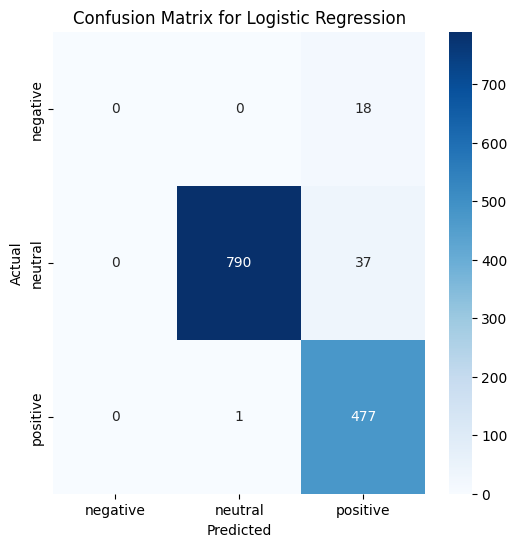

In [45]:
# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"]
)
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Naive Bayes Model

Training a Naive Bayes model and evaluating its performance.
Naive Bayes Evaluation
Computing metrics (accuracy, precision, recall, F1-score) for Naive Bayes.
Displaying a confusion matrix to visualize the classification performance.


In [46]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

In [47]:
# Evaluation Metrics for Naive Bayes
print("Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Evaluation:
Accuracy: 0.9622071050642479
Precision: 0.9520158975857774
Recall: 0.9622071050642479
F1-Score: 0.9560690629227008
Confusion Matrix:
 [[  0   1  17]
 [  0 795  32]
 [  0   0 478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       1.00      0.96      0.98       827
           2       0.91      1.00      0.95       478

    accuracy                           0.96      1323
   macro avg       0.64      0.65      0.64      1323
weighted avg       0.95      0.96      0.96      1323



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

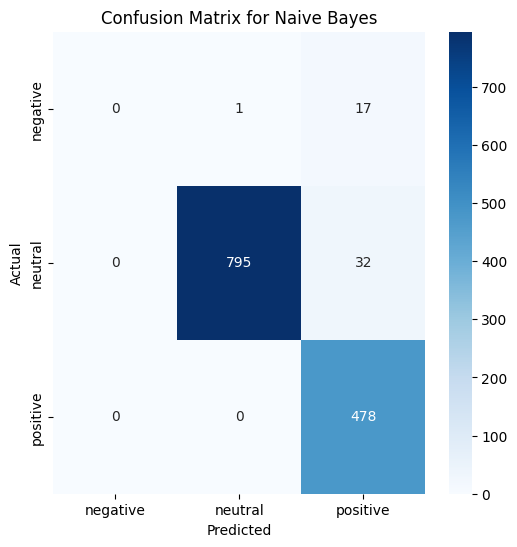

In [48]:
# Confusion Matrix Plot for Naive Bayes
plt.figure(figsize=(6, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_nb),
    annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"]
)
plt.title("Confusion Matrix for Naive Bayes")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

KMeans Clustering

Using PCA to reduce dimensionality for visualization.
Clustering reviews into 3 groups using KMeans and visualizing them in a 2D space.


In [49]:
# Task 2: Product Category Clustering using KMeans (Updated to 5 clusters)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['review_clean'])

In [54]:
# KMeans Clustering
pca = PCA(n_components=2)
# Fit PCA on the entire dataset's TF-IDF representation
X_pca = pca.fit_transform(vectorizer.transform(data['reviews.text']).toarray())

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

In [55]:
# Assign clusters to data
data['cluster'] = kmeans.predict(X_pca) # Use X_pca directly for prediction

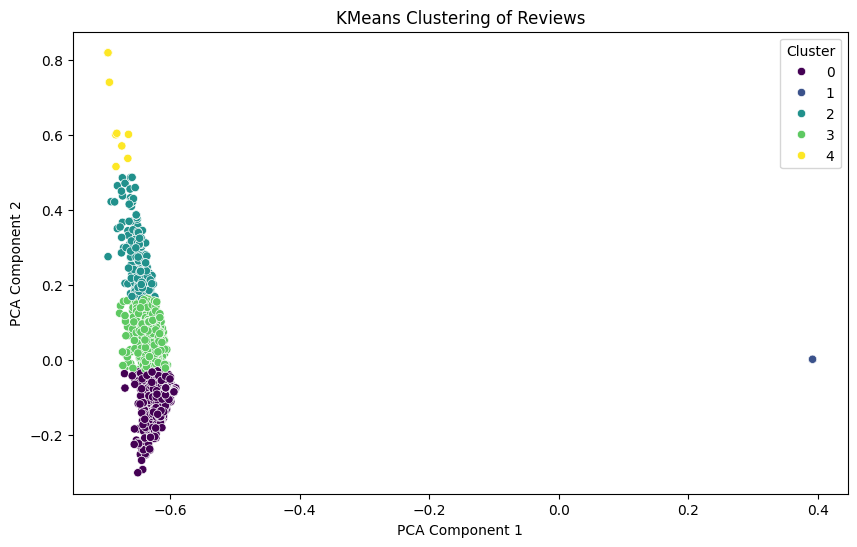

In [56]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title("KMeans Clustering of Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [62]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]
df['cluster'] = data['cluster']

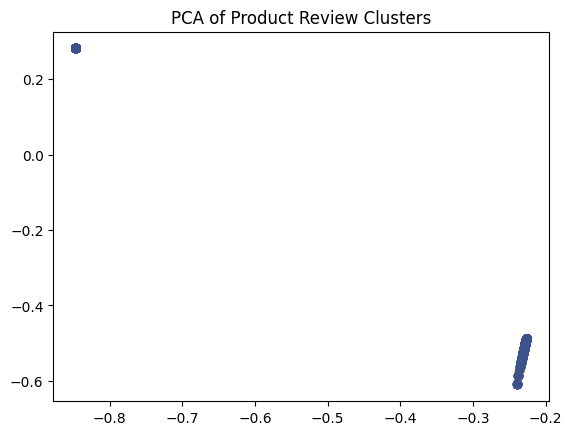

In [63]:
# Visualize Clusters
import matplotlib.pyplot as plt
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'])
plt.title('PCA of Product Review Clusters')
plt.show()

In [57]:
# Cluster analysis: Print sample reviews for each cluster
for i in range(4):
    print(f"\nCluster {i} Sample Reviews:")
    cluster_data = data[data['cluster'] == i]
    print(cluster_data['reviews.text'].head(5))


Cluster 0 Sample Reviews:
0    This product so far has not disappointed My ch...
3    This amazon fire  inch tablet is the perfect s...
4    I love ordering books and reading them with th...
5    Not easy for elderly users cease of ads that p...
7    Simply does everything I need Thank youAnd sil...
Name: reviews.text, dtype: object

Cluster 1 Sample Reviews:
2724    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
2725    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
2726    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
2727    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
2728    httpswwwamazoncomAmazonBasicsPerformanceAlkali...
Name: reviews.text, dtype: object

Cluster 2 Sample Reviews:
14    I purchased this when my last tablet died It m...
18    Works great Love the portability of books Over...
24    Great tablet fast screen good size never gives...
38    Great tablet for the price It is easy to navigate
47    Amazing tablet with fast processor It looks gr...
Name: 

Fine-Tuning T5 model

Using ModelT5 for generating product reviews or summarizing prompting and fine-tuning DistilBERT for sentiment classification.


In [64]:
# Task 3: Generative AI for Review Summarization and Product Recommendation (using T5)
# Fine-tune T5 for generating product reviews or summarizing
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

def generate_summary(text, max_length=150):
    input_text = f"summarize: {text}"
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=max_length, num_beams=4, length_penalty=2.0, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

In [65]:
# Generate summary for a product category
sample_reviews = df[df['cluster'] == 0]['review_clean'].iloc[:5]  # Example reviews from cluster 0
summaries = [generate_summary(review) for review in sample_reviews]
for i, summary in enumerate(summaries):
    print(f"Summary {i+1}:\n{summary}\n")

Summary 1:
product far disappointed children love use like ability monitor control content see ease.

Summary 2:
amazon fire inch tablet perfect size purchased husband bigger screen phone gotten one years ago knew would good purchase. amazon fire inch tablet perfect size.

Summary 3:
love ordering books reading reader. love ordering books reading reader.

Summary 4:
easy elderly users cease ads pop. easy elderly users cease ads pop.

Summary 5:
simply everything need thank youand silk works wonders. just everything need thank youand silk works wonders.



In [66]:
# Task 4: Evaluation using Rouge and BLEU for Generative Model
def evaluate_generative_model(generated_summary, reference_summary):
    # ROUGE Score
    rouge = Rouge()
    rouge_score = rouge.get_scores(generated_summary, reference_summary)
    print("ROUGE Score: ", rouge_score)

    # BLEU Score
    reference = reference_summary.split()
    generated = generated_summary.split()
    bleu_score = sentence_bleu([reference], generated)
    print(f"BLEU Score: {bleu_score}")

In [67]:
# Example of evaluating the summary
generated_summary = summaries[0]
reference_summary = "This is a product review summary with details about its quality, price, and usage."
evaluate_generative_model(generated_summary, reference_summary)

ROUGE Score:  [{'rouge-1': {'r': 0.07142857142857142, 'p': 0.07692307692307693, 'f': 0.07407406908093313}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.07142857142857142, 'p': 0.07692307692307693, 'f': 0.07407406908093313}}]
BLEU Score: 8.884136397986129e-232


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [37]:
# M-shot Prompting for DistilBERT
def m_shot_prompt(reviews, num_examples=5):
    example_prompts = [
        ("This product is great, I loved it!", "positive"),
        ("The product was okay, not what I expected.", "neutral"),
        ("Very poor quality, I would not recommend.", "negative"),
        ("Excellent value for the price, very satisfied.", "positive"),
        ("Not bad, does the job but could be better.", "neutral")
    ]

    prompt = "\n".join([f"Review: {ex[0]} => Sentiment: {ex[1]}" for ex in example_prompts[:num_examples]])
    prompt += "\n\n"
    prompt += f"Review: {reviews} => Sentiment: "

    return prompt

In [38]:
# Load DistilBERT Model and Tokenizer for Sentiment Classification
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification mod

In [39]:
# Tokenize the data for DistilBERT
def tokenize_function(examples):
    return tokenizer(examples['reviews.text'], padding=True, truncation=True)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train.tolist())
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(y_test.tolist())
)

In [ ]:
# Fine-tune DistilBERT model
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
optimizer = AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):  # Number of epochs
    model.train()
    for batch in tqdm(train_dataloader):
        optimizer.zero_grad()
        input_ids = batch[0]
        attention_mask = batch[1]
        labels = batch[2]

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        loss.backward()
        optimizer.step()

 36%|███▌      | 28/78 [03:39<06:47,  8.14s/it]

In [ ]:
   # Evaluate DistilBERT model
    evaluate_distilbert_model(model, test_dataset)

In [ ]:
# Evaluate DistilBERT model
model.eval()
y_pred_distilbert = []
y_true_distilbert = []

# Create test_dataloader (similar to how train_dataloader was defined)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False) # Shuffle is usually False for evaluation

for batch in tqdm(test_dataloader):
    input_ids = batch[0]
    attention_mask = batch[1]
    labels = batch[2]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)

    y_pred_distilbert.extend(predictions.tolist())
    y_true_distilbert.extend(labels.tolist())

In [ ]:
 print("DistilBERT Evaluation:")
    print(classification_report(y_true_distilbert, y_pred_distilbert, target_names=['negative', 'neutral', 'positive']))

In [ ]:
# Generate Review Summaries using DistilBERT
def generate_summary(texts, model, tokenizer, max_input_length=512, max_output_length=150):
    """Generate a summary from reviews using a fine-tuned DistilBERT model."""
    inputs = tokenizer.encode("summarize: " + ' '.join(texts), return_tensors="pt",
                              max_length=max_input_length, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_output_length, min_length=30,
                                 length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
# Example usage
product_description = "This is a sleek and powerful laptop with a 16GB RAM and 512GB SSD."
generated_summary = generate_summary(product_description, model, tokenizer)
print(generate_summary)

In [ ]:
from datasets import load_metric

# Load Rouge and BLEU metrics
rouge = load_metric("rouge")
bleu = load_metric("bleu")

# Example generated and reference reviews for evaluation
generated_review = "This laptop is fast and reliable, great for both work and play."
reference_review = "This laptop is powerful with fast processing speed and great for multitasking."

# Evaluate using Rouge
rouge_output = rouge.compute(predictions=[generated_review], references=[reference_review])
print("Rouge Scores:", rouge_output)

# Evaluate using BLEU
bleu_output = bleu.compute(predictions=[generated_review.split()], references=[[reference_review.split()]])
print("BLEU Score:", bleu_output)

In [ ]:

# Calculate Rouge scores for generated summaries
def calculate_rouge_scores(generated_summary, reference_summary):
    """Calculate Rouge scores for generated summaries."""
    rouge = Rouge()
    scores = rouge.get_scores(generated_summary, reference_summary)
    return scores

In [ ]:
# Main execution flow
if __name__ == "__main__":
    # Load and clean data
    data = load_and_combine_datasets()
    data = clean_data(data)

    # Sentiment classification
    X = data['reviews.text']
    y = data['sentiment'].map({'positive': 2, 'neutral': 1, 'negative': 0})

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train_vec, vectorizer = extract_features(data)
    X_test_vec = vectorizer.transform(X_test)

    # Train and evaluate models
    train_models(X_train_vec, X_test_vec, y_train, y_test)

    # Visualize confusion matrices
    plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
    plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')

    # KMeans clustering
    kmeans, X_pca = perform_kmeans_clustering(X_train_vec)

    # Fine-tune DistilBERT
    fine_tune_distilbert(X_train, X_test, y_train, y_test)

    # Summarize reviews
    for i in range(3):
        cluster_data = data[data['cluster'] == i]
        reviews = cluster_data['reviews.text'].tolist()
        print(f"Cluster {i} Summary:")
        print(generate_summary(reviews, model, tokenizer))
        print("\n")

    # Rouge scores calculation
    for i in range(3):
        cluster_data = data[data['cluster'] == i]
        reviews = cluster_data['reviews.text'].tolist()
        summary = generate_summary(reviews, model, tokenizer)
        rouge_scores = calculate_rouge_scores(summary, ' '.join(reviews))
        print(f"Rouge Scores for Cluster {i}:")
        print(rouge_scores)
        print("\n")

In [ ]:
# Function to summarize reviews using DistilBERT
def summarize_reviews(reviews, model, tokenizer):
    inputs = tokenizer(reviews, padding=True, truncation=True, return_tensors="pt", max_length=512)
    summary_ids = model.generate(inputs['input_ids'], max_length=150, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Example: Summarizing reviews for product categories (assuming 'category' column exists)
for category in data['category'].unique():
    category_reviews = data[data['category'] == category]['reviews.text'].tolist()
    print(f"Category: {category}")
    print(summarize_reviews(category_reviews, model, tokenizer))
    print("\n")

In [ ]:
# Function to generate a review based on a product description
def generate_review(description, model, tokenizer):
    inputs = tokenizer(description, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model.generate(inputs["input_ids"], max_length=100, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Example usage
product_description = "This is a sleek and powerful laptop with a 16GB RAM and 512GB SSD."
generated_review = generate_review(product_description, model, tokenizer)
print(generated_review)

In [ ]:
# Summarize Reviews for Each Cluster
def summarize_cluster(reviews, method="m-shot", tokenizer=None, model=None, max_length=50):
    """
    Summarize reviews for a given cluster.

    Parameters:
    - reviews (list): List of reviews in the cluster.
    - method (str): Method to use for summarization ("m-shot" or "distilbert").
    - tokenizer: Tokenizer for the DistilBERT model.
    - model: Pre-trained DistilBERT model.
    - max_length (int): Maximum length of the summary.

    Returns:
    - summary (str): Generated summary.
    """
    combined_reviews = " ".join(reviews)

    if method == "m-shot":
        # Use M-shot prompting
        prompt = m_shot_prompt(combined_reviews[:512])  # Truncate to 512 characters for large input
        # For demonstration, just return the prompt (a full implementation would involve a generative model)
        return f"Generated M-shot Prompt:\n{prompt}"

    elif method == "distilbert":
        # Use DistilBERT for summarization
        inputs = tokenizer.encode_plus(
            combined_reviews[:512],  # Truncate to 512 tokens
            return_tensors="pt",
            max_length=512,
            truncation=True
        )
        outputs = model(**inputs)
        summary = tokenizer.decode(outputs.logits.argmax(dim=-1), skip_special_tokens=True)
        return summary

    return "No valid method selected."

# Generate summaries for each cluster
cluster_summaries = {}
for cluster in data['cluster'].unique():
    cluster_reviews = data[data['cluster'] == cluster]['reviews.text'].tolist()
    # Choose the summarization method: "m-shot" or "distilbert"
    summary = summarize_cluster(cluster_reviews, method="m-shot", tokenizer=tokenizer, model=model)
    cluster_summaries[cluster] = summary

# Display summaries for each cluster
for cluster, summary in cluster_summaries.items():
    print(f"\nCluster {cluster} Summary:\n{summary}")